Task 2: Quantitative Analysis Using PyNance & TA-Lib
🎯 Goal:
Analyze historical stock data by computing technical indicators and financial metrics.

Add the Project Root to sys.path
In the first cell:


In [18]:
import sys
from pathlib import Path

# Add root path to import scripts
sys.path.append(str(Path().resolve().parent))


Import  Modular Functions

In [19]:
from scripts.stock_data import load_stock_csv
from scripts.technical_indicators import calculate_indicators
from scripts.visualization import plot_ma, plot_rsi, plot_macd

import pandas as pd


In [20]:

PROJECT_ROOT = Path().resolve().parent
OUTPUT_DIR = PROJECT_ROOT / "output"
OUTPUT_DIR.mkdir(exist_ok=True)

tickers = ["AAPL", "GOOG", "AMZN", "MSFT", "TSLA", "NVDA", "META"]

for ticker in tickers:
    print(f"📈 {ticker}")
    df = load_stock_csv(ticker)
    if df.empty:
        print(f"⚠️ No data for {ticker}")
        continue
    df = calculate_indicators(df)
    plot_ma(df, ticker, output_dir=str(OUTPUT_DIR))
    plot_rsi(df, ticker, output_dir=str(OUTPUT_DIR))
    plot_macd(df, ticker, output_dir=str(OUTPUT_DIR))
   



📈 AAPL
📈 GOOG
📈 AMZN
📈 MSFT
📈 TSLA
📈 NVDA
📈 META


🖼️ Showing plots for AAPL


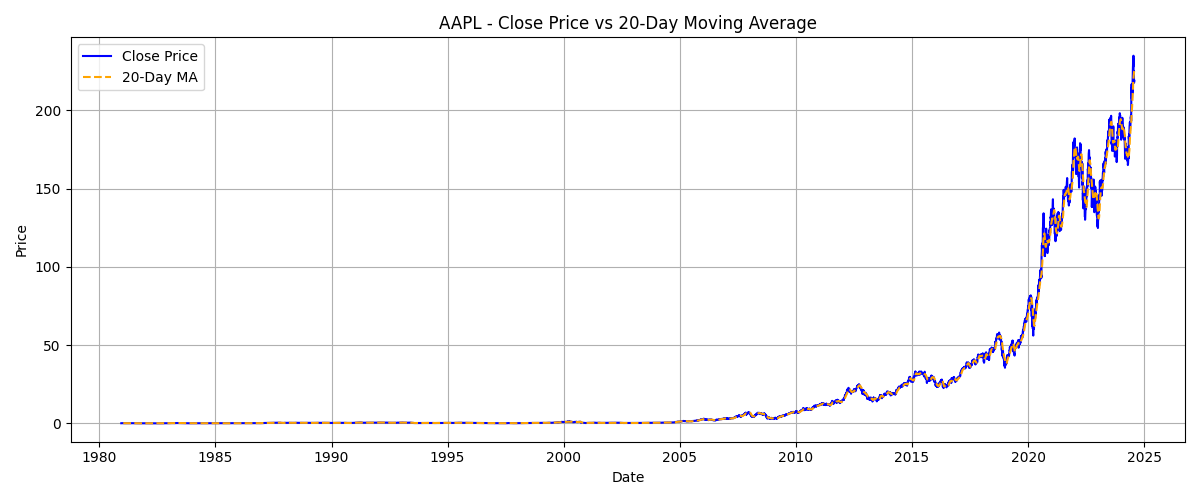

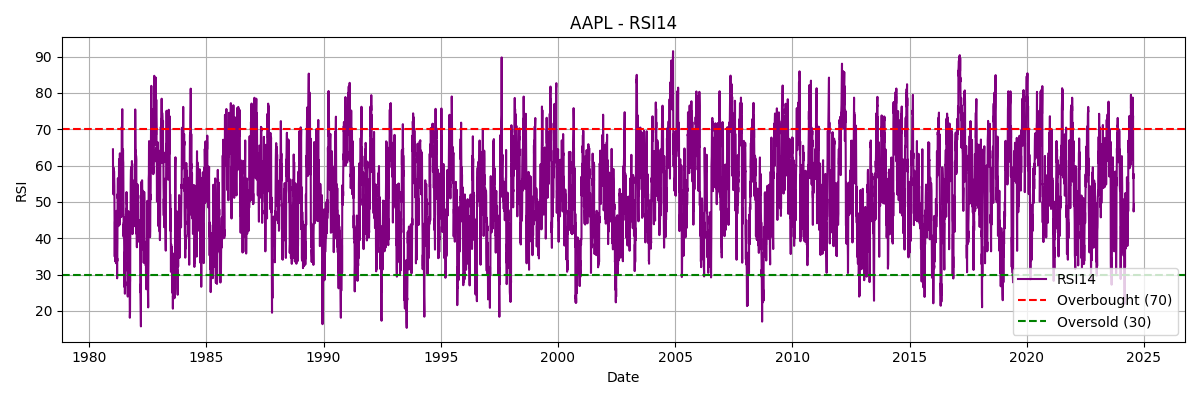

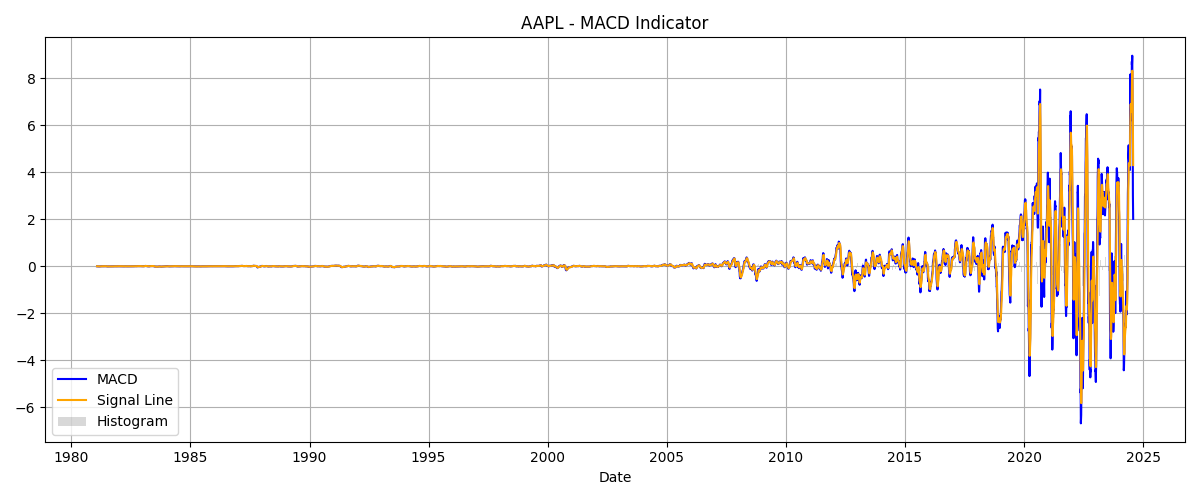

🖼️ Showing plots for GOOG


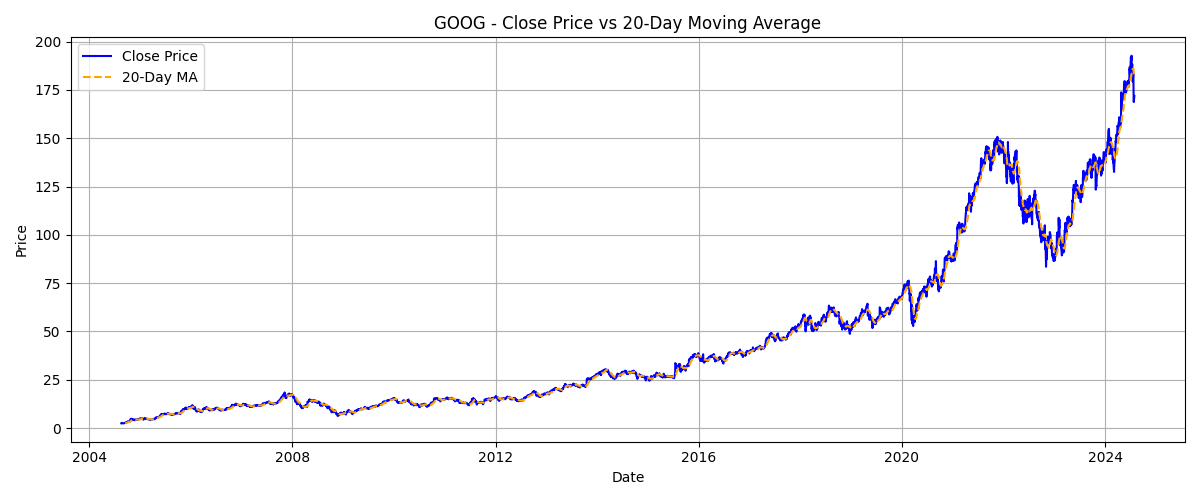

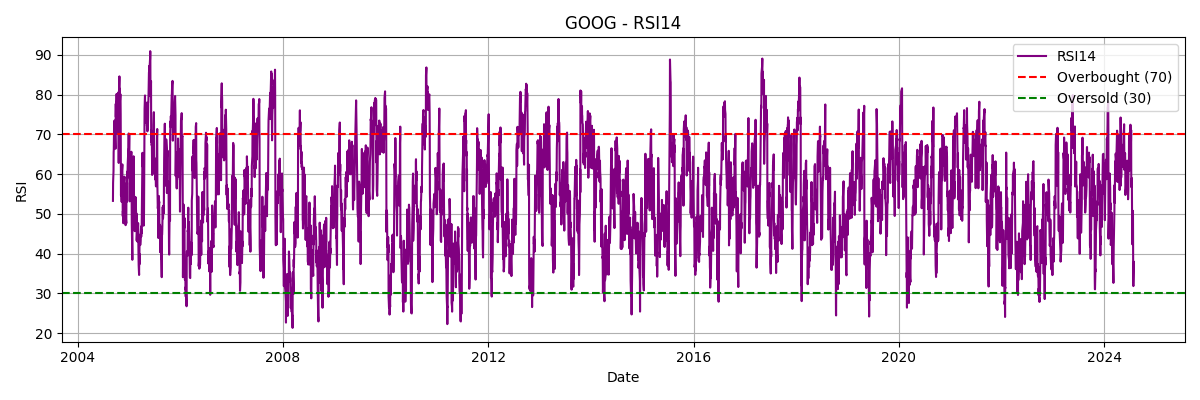

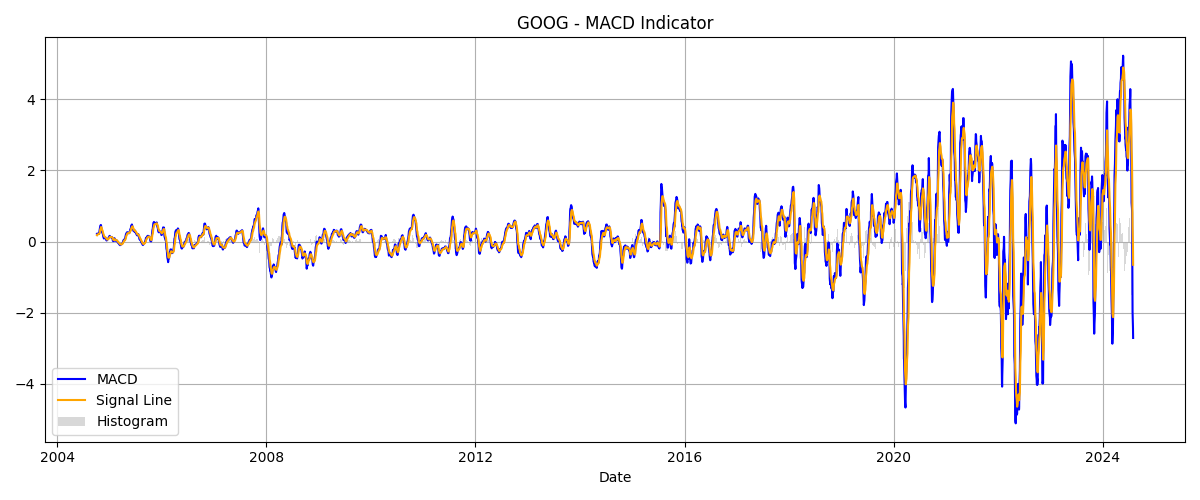

🖼️ Showing plots for AMZN


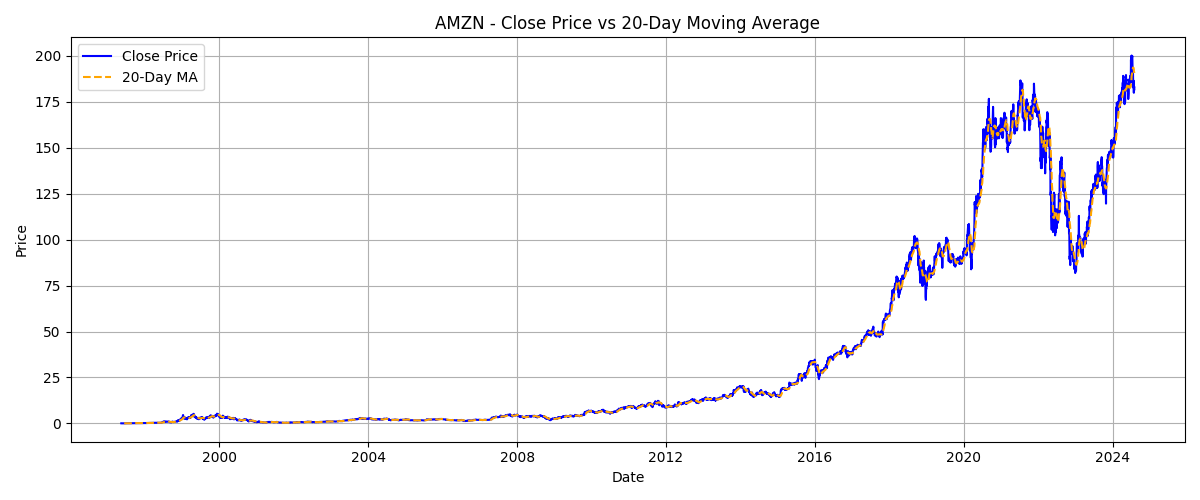

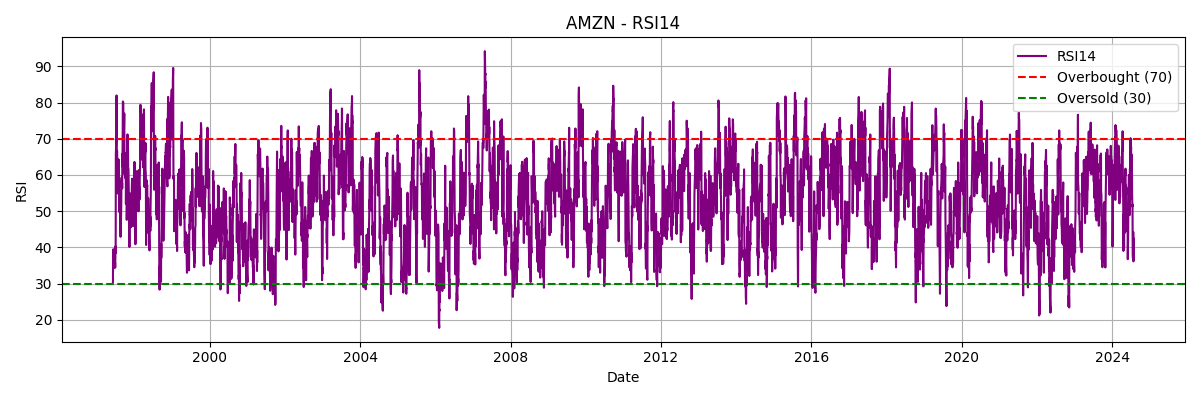

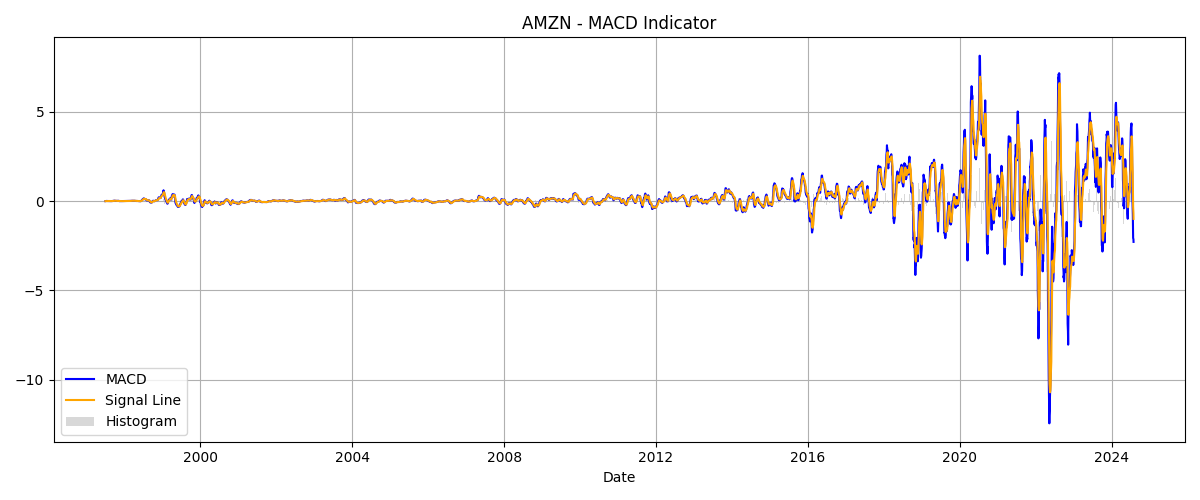

🖼️ Showing plots for MSFT


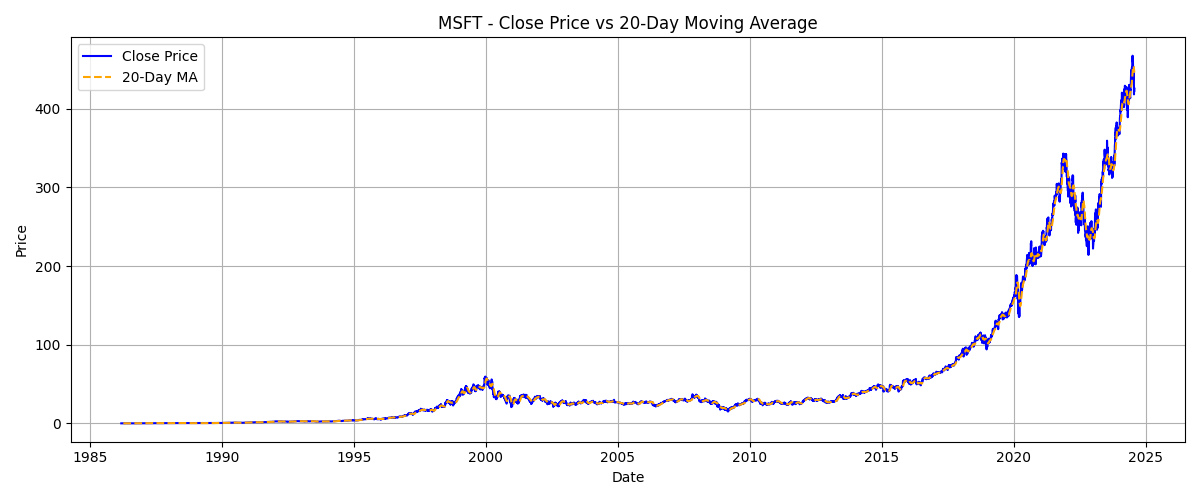

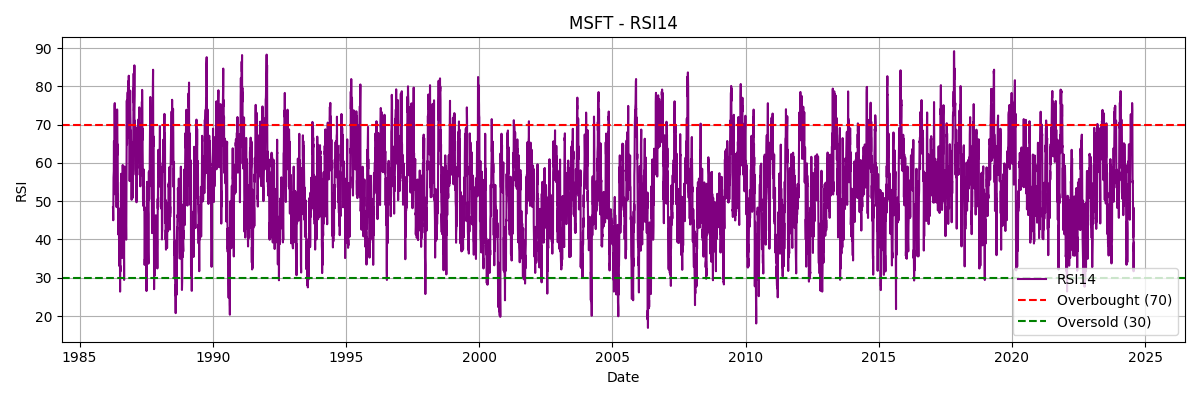

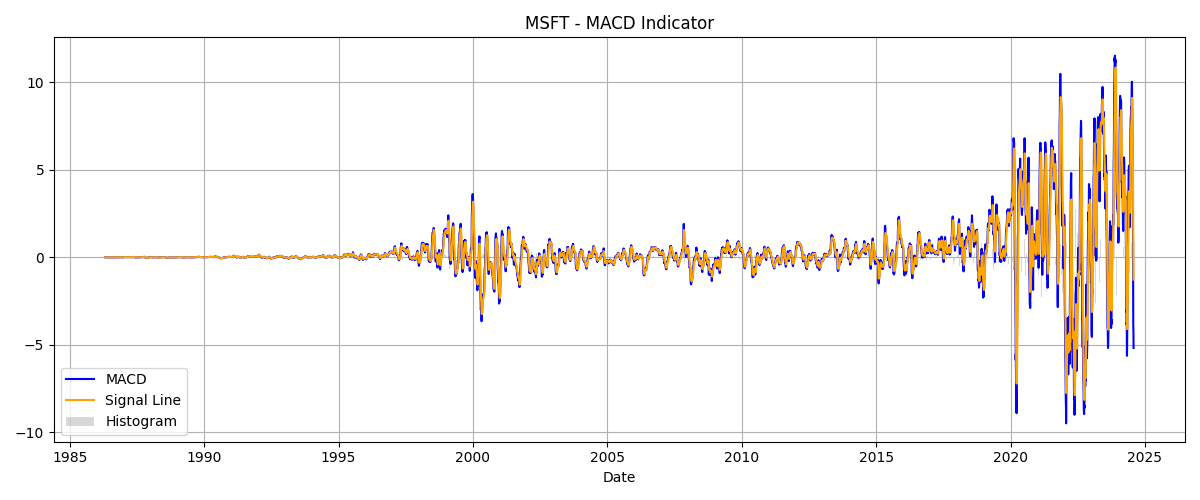

🖼️ Showing plots for TSLA


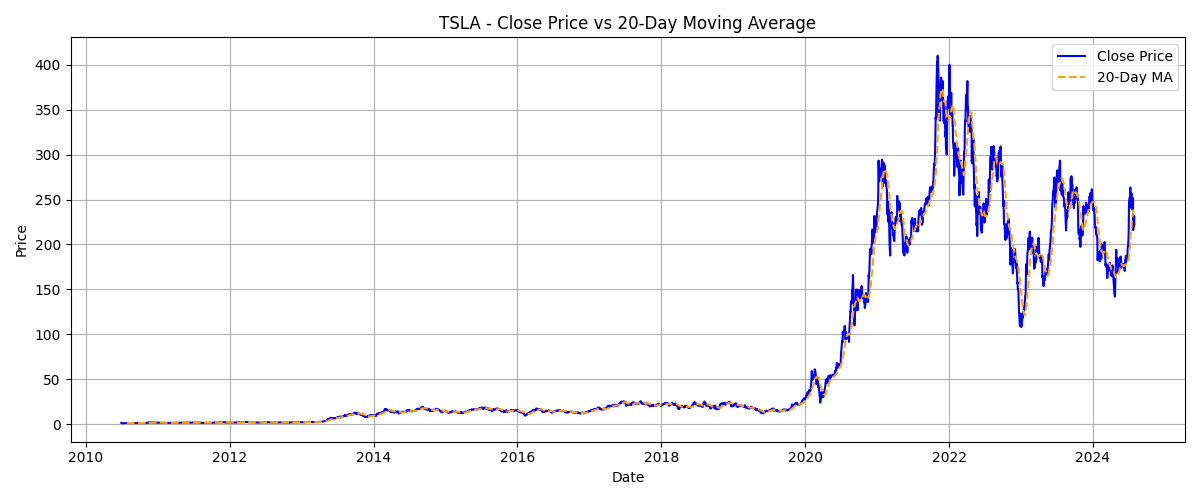

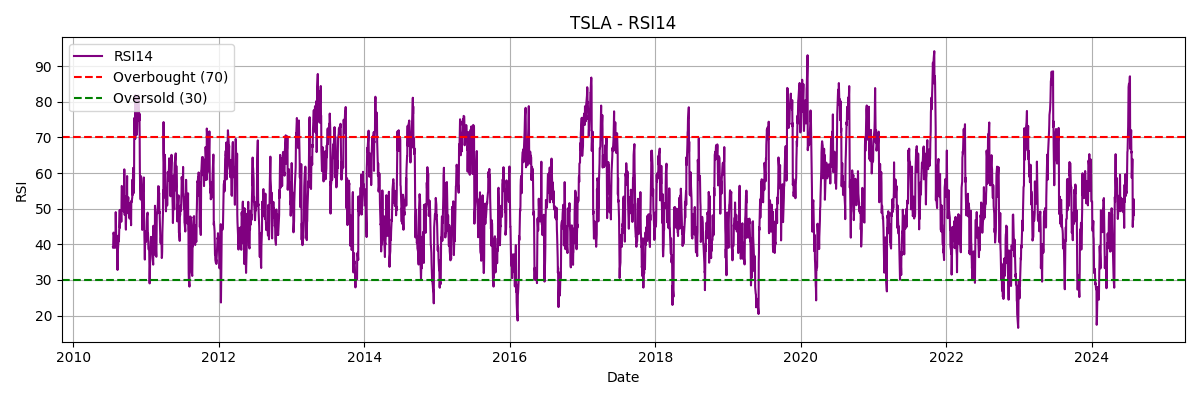

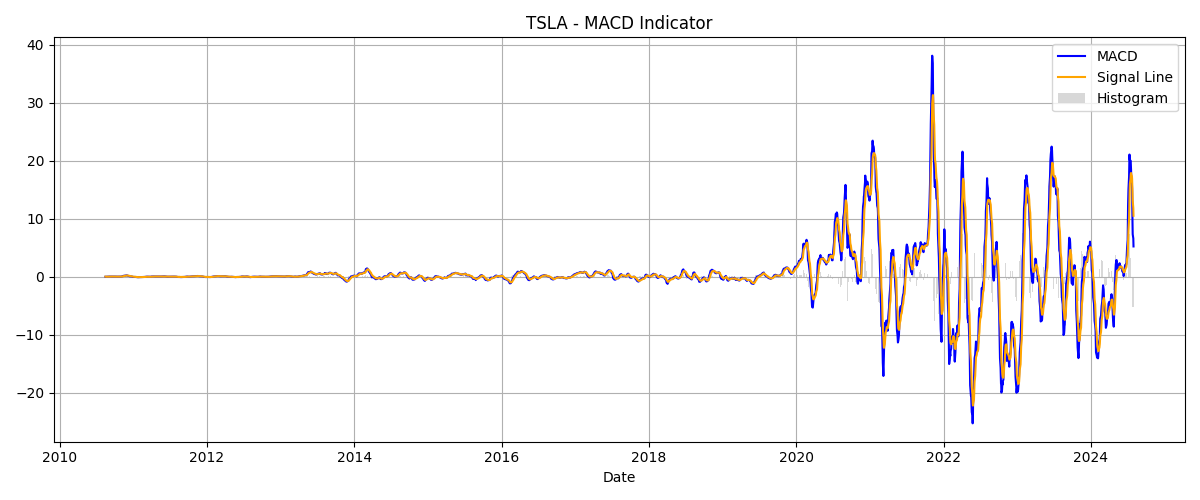

🖼️ Showing plots for NVDA


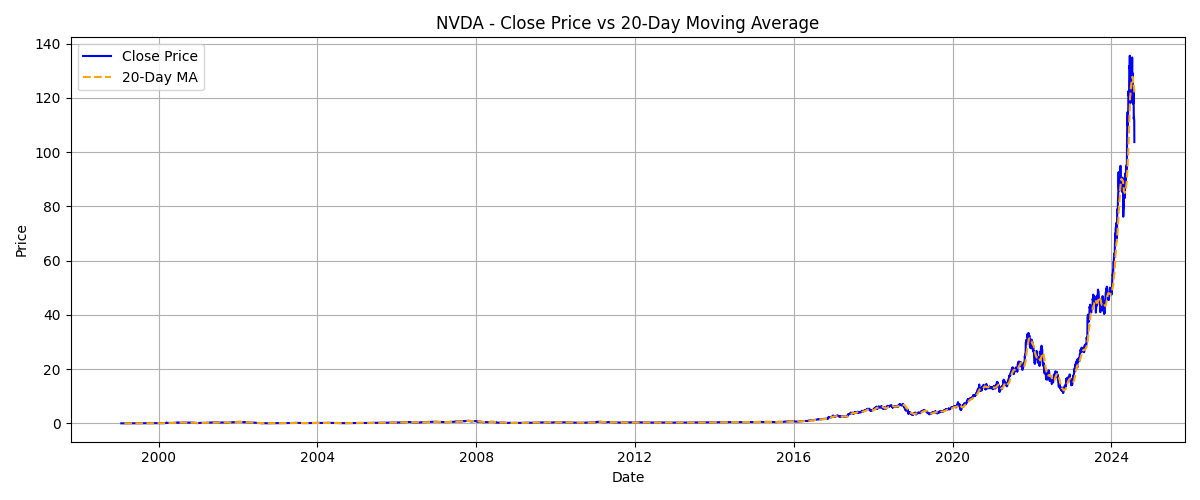

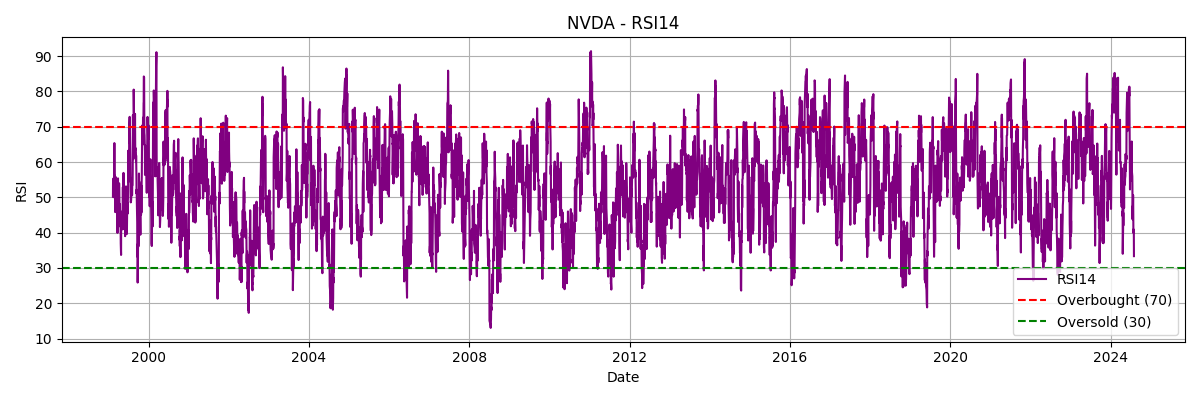

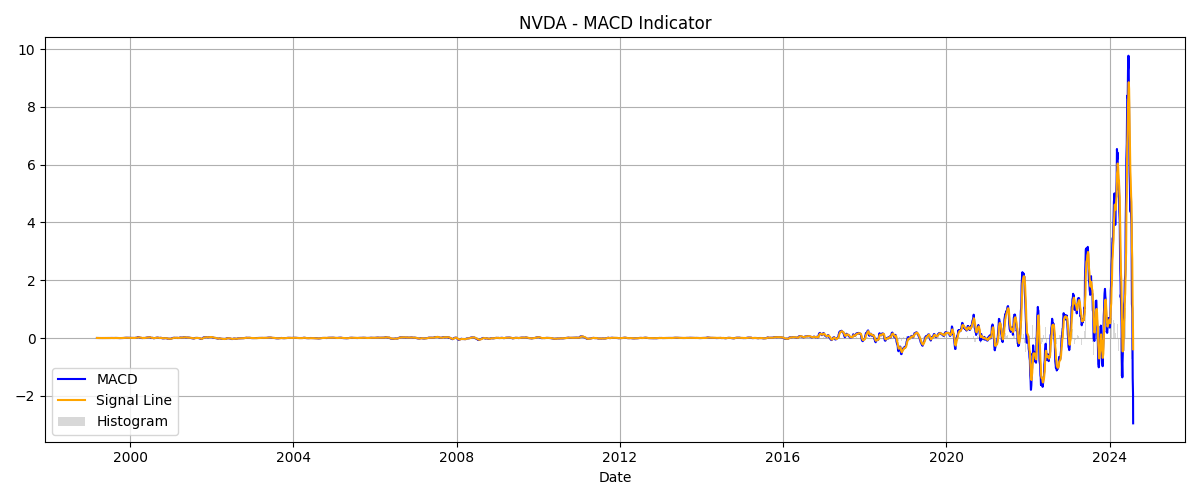

🖼️ Showing plots for META


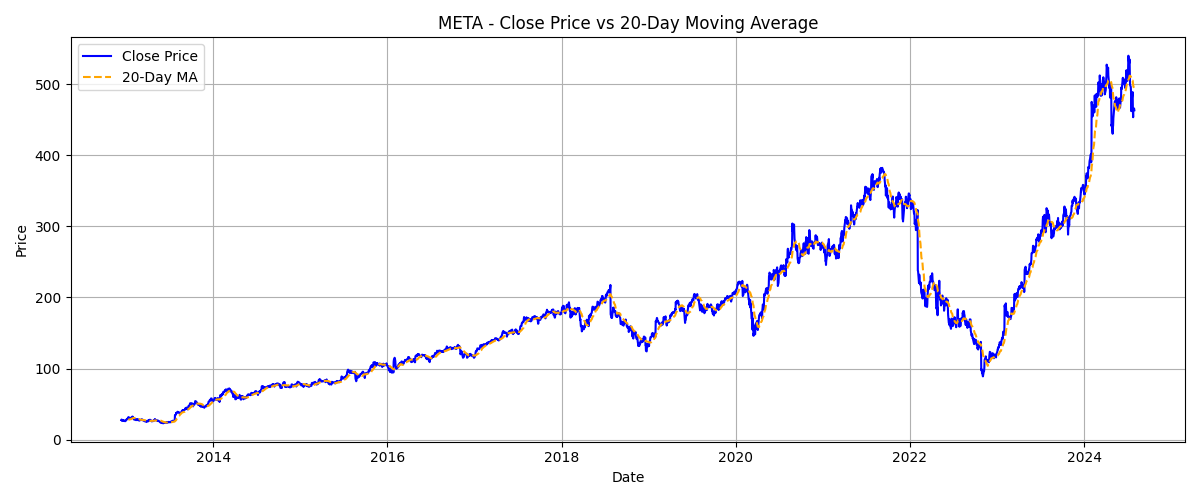

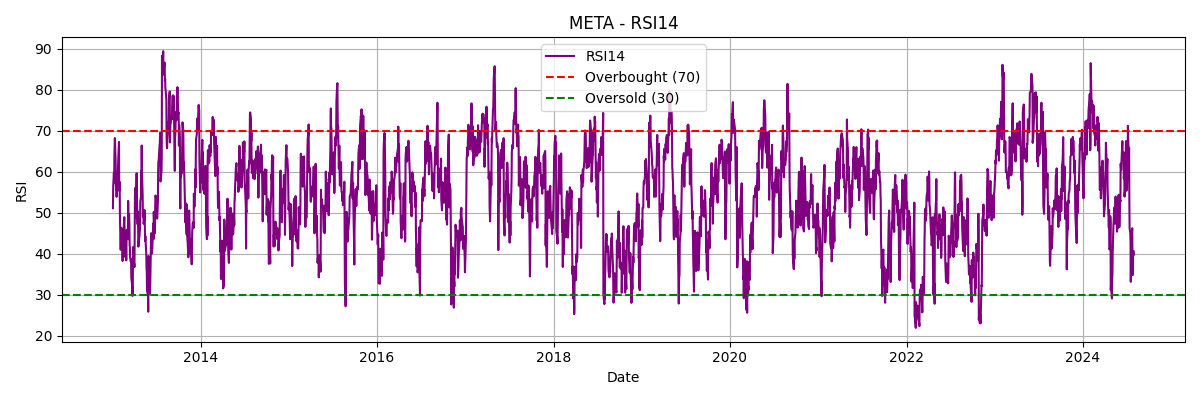

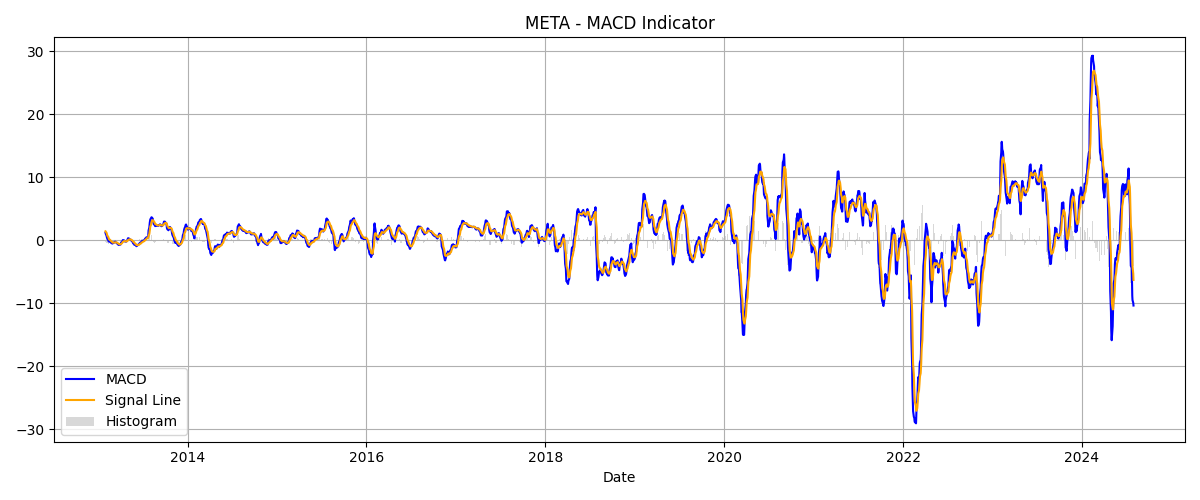

In [21]:
from IPython.display import Image, display

for ticker in tickers:
    print(f"🖼️ Showing plots for {ticker}")
    display(Image(filename=f"../output/{ticker}_ma_plot.png"))
    display(Image(filename=f"../output/{ticker}_rsi_plot.png"))
    display(Image(filename=f"../output/{ticker}_macd_plot.png"))


In [25]:
from scripts.financial_metrics import calculate_metrics

metrics = calculate_metrics(df)
print(f"📊 {ticker} Metrics:\n{metrics}\n")


📊 META Metrics:
Sharpe_Ratio    0.7977
Volatility      0.3854
dtype: float64



In [27]:
all_metrics = []

for ticker in tickers:
    ...
    df = calculate_indicators(df)
    metrics = calculate_metrics(df)
    metrics["Ticker"] = ticker
    all_metrics.append(metrics)

# Save to CSV
pd.DataFrame(all_metrics).set_index("Ticker").to_csv("../output/summary_metrics.csv")
